In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.patches as mpatches

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'code')
from help_funcs import *

In [2]:
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

In [3]:
def periodic_distance(p1, p2, L=1.0):
    """
    Calculates the periodic distance between two points on a 1x1 2-dimensional plane.

    Parameters
    ----------
    p1 : numpy array
        The first point, with shape (2,).
    p2 : numpy array
        The second point, with shape (2,).
    L : float
        The length of the periodic boundary, default value is 1.0.

    Returns
    -------
    distance : float
        The periodic distance between two points.
    """
    delta = np.abs(p1 - p2)
    delta = np.where(delta > L/2, L - delta, delta)
    return np.sqrt(np.sum(delta**2))


In [20]:
def plot_raster(all_spikes, all_positions, tmin = 1000, tmax = 2000):
    
    blue_patch = mpatches.Patch(color='blue', label='PV ChR2 stim')
    black_patch = mpatches.Patch(color='black', label='visual stim')


    order = 1000

    # test out plotting code   
    fig, axes = plt.subplots(3,1,figsize = (12,15),gridspec_kw = {'height_ratios':[4,1,1]})

    ax0 = axes[0]
#     ax0.set_title('contrast=0, local PV stim = 0.1')
    ax0.set_ylabel('Exc',fontsize=15)
    ax0.set_xticks([])
    ax0.set_ylim([0,8*order])
    ax0.set_xlim([tmin,tmax])
    
    center = np.array([0.5,0.5])
    exc_sorted = []
    for i in range(8000):
        dist = periodic_distance(center,all_positions[i])
        exc_sorted.append([dist, i])
    exc_sorted.sort()
    
    for i in range(8*order):
        ni = exc_sorted[i][1]
        spikeTimes = all_spikes[:8*order][ni][all_spikes[:8*order][ni]<tmax]
        spikeTimes = spikeTimes[spikeTimes>tmin]
        index = i*np.ones(len(spikeTimes))
        ax0.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
#     ax0.add_patch(plt.Polygon((np.array([[1900,-200],[tmin,0],[tmin+100,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[2400,-200],[tmin+500,0],[tmin+600,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[2900,-200],[tmin+1000,0],[3100,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[3400,-200],[3500,0],[3600,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[3900,-200],[4000,0],[4100,-200]])),clip_on=False,color='black'))

    ax1 = axes[1]
    ax1.set_xlim([tmin,tmax])
    ax1.set_ylim([0,order])
    ax1.set_ylabel('PV',fontsize=15)
    ax1.set_xticks([])
    
    pv_sorted = []
    for i in range(8000,9000):
        dist = periodic_distance(center,all_positions[i])
        pv_sorted.append([dist, i])
    pv_sorted.sort()
    
    for i in range(1000):
        ni = pv_sorted[i][1]
        spikeTimes = all_spikes[ni][all_spikes[ni]<tmax]
#         spikeTimes = all_spikes[8*order:9*order][ni-8000][all_spikes[8*order:9*order][ni-8000]<tmax]
        spikeTimes = spikeTimes[spikeTimes>tmin]
        index = i*np.ones(len(spikeTimes))
        ax1.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
#     ax1.add_patch(plt.Polygon((np.array([[2400,-200],[2500,0],[2600,-200]])),clip_on=False,color='blue'))
#     ax1.add_patch(plt.Polygon((np.array([[3400,-200],[3500,0],[3600,-200]])),clip_on=False,color='blue'))
#     ax1.legend(handles=[blue_patch,black_patch], loc='center left', bbox_to_anchor=(1, 1.7), fontsize=18)

    ax2 = axes[2]
    ax2.set_ylim([0,order])
    ax2.set_xlim([tmin,tmax])
    ax2.set_ylabel('SST',fontsize=15)
    ax2.set_xlabel('time, t (ms)',fontsize=20)
    sst_sorted = []
    for i in range(9000,10000):
        dist = periodic_distance(center,all_positions[i])
        sst_sorted.append([dist, i])
#         print(i)
    sst_sorted.sort()
    
    for i in range(1000):
        ni = sst_sorted[i][1]
#         print(ni)
        spikeTimes = all_spikes[ni][all_spikes[ni]<tmax]
        spikeTimes = spikeTimes[spikeTimes>tmin]
        index = i*np.ones(len(spikeTimes))
        ax2.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)

    plt.show()

In [46]:
def get_stmap(all_spikes, all_positions):
    
    control_times = [ti*2000 for ti in range(1,5)]
    stim_times = [ti*2000+1000 for ti in range(1,5)]
    
    tbinsize = 1
    tlen = int(600/tbinsize)
    
    exc_ctrl, exc_stim = np.zeros([1000,tlen]), np.zeros([1000,tlen])
    pv_ctrl, pv_stim = np.zeros([1000,tlen]), np.zeros([1000,tlen])
    sst_ctrl, sst_stim = np.zeros([1000,tlen]), np.zeros([1000,tlen])
    
    
    blue_patch = mpatches.Patch(color='blue', label='PV ChR2 stim')
    black_patch = mpatches.Patch(color='black', label='visual stim')

    order = 1000

    center = np.array([0.5,0.5])
    exc_sorted = []
    for i in range(8000):
        dist = periodic_distance(center,all_positions[i])
        exc_sorted.append([dist, i])
    exc_sorted.sort()
    
    xbinsize = 8
    
    for tmin in control_times:
        tmax = tmin + tlen
        for i in range(8000):
            ni = exc_sorted[i][1]
            spikeTimes = all_spikes[:8*order][ni][all_spikes[:8*order][ni]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                exc_ctrl[xbin,tbin] += 1
                
    for tmin in stim_times:
        tmax = tmin + tlen
        for i in range(8000):
            ni = exc_sorted[i][1]
            spikeTimes = all_spikes[:8*order][ni][all_spikes[:8*order][ni]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                exc_stim[xbin,tbin] += 1
            
    
    pv_sorted = []
    for i in range(8000,9000):
        dist = periodic_distance(center,all_positions[i])
        pv_sorted.append([dist, i])
    pv_sorted.sort()
    
    xbinsize = 1
    
    for tmin in control_times:
        tmax = tmin + tlen
        for i in range(1000):
            ni = pv_sorted[i][1]
            spikeTimes = all_spikes[8*order:9*order][ni-8000][all_spikes[8*order:9*order][ni-8000]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                pv_ctrl[xbin,tbin] += 1
                
    for tmin in stim_times:
        tmax = tmin + tlen
        for i in range(1000):
            ni = pv_sorted[i][1]
            spikeTimes = all_spikes[8*order:9*order][ni-8000][all_spikes[8*order:9*order][ni-8000]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                pv_stim[xbin,tbin] += 1

    sst_sorted = []
    for i in range(9000):
        dist = periodic_distance(center,all_positions[i])
        sst_sorted.append([dist, i])
    sst_sorted.sort()
    
        
    for tmin in control_times:
        tmax = tmin + tlen
        for i in range(1000):
            ni = sst_sorted[i][1]
            spikeTimes = all_spikes[9*order:][ni-9000][all_spikes[9*order:][ni-9000]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                sst_ctrl[xbin,tbin] += 1
                
    for tmin in stim_times:
        tmax = tmin + tlen
        for i in range(1000):
            ni = sst_sorted[i][1]
            spikeTimes = all_spikes[9*order:][ni-9000][all_spikes[9*order:][ni-9000]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                sst_stim[xbin,tbin] += 1
                
    return exc_ctrl, exc_stim, pv_ctrl, pv_stim, sst_ctrl, sst_stim

In [17]:
simname = 'b7ns1.0e0.2'
with open(f'data/{simname}/results_1/PV_0.18_spikes.pickle','rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/PV_0.18_positions.pickle','rb') as f:
    all_positions = pickle.load(f)
plot_raster(all_spikes, all_positions, tmin = 0, tmax = 2000)

FileNotFoundError: [Errno 2] No such file or directory: 'data/b7ns1.0e0.2/results_1/PV_0.18_spikes.pickle'

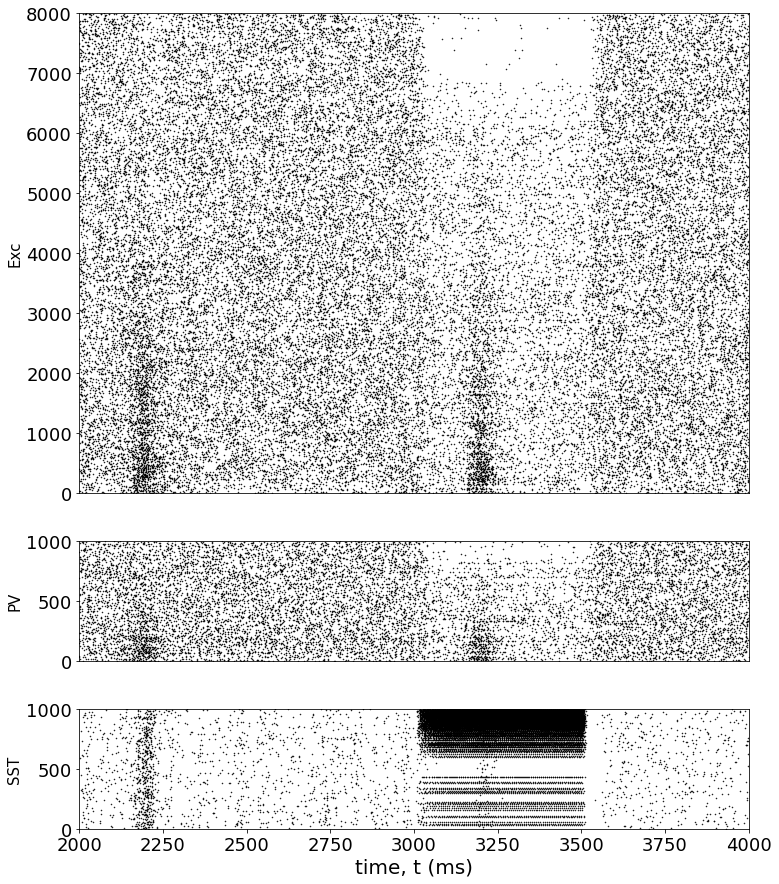

In [90]:
# simname = 'lb8ns1.0e0.2'
simname = 'v2base'
stim = 'SOM'
cont = 0.18
with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
    all_positions = pickle.load(f)
plot_raster(all_spikes, all_positions, tmin = 2000, tmax = 4000)



In [38]:
dt = 5
alls = [t for event in all_spikes[8000:9000] for t in event]
hist, bins = np.histogram(alls, bins=np.arange(1000, 1700 + dt, dt))
hist2, bins2 = np.histogram(alls, bins=np.arange(2000, 2700 + dt, dt))

In [42]:
def bin_fr(spikes, tmin, tmax, dt):
    alls = [t for event in spikes for t in event]
    hist, bins = np.histogram(alls, bins=np.arange(tmin, tmax + dt, dt))
    return hist, bins

In [65]:
def get_averages(spikes, tlen = 700, dt = 10):
    ctrl_times = [2000,4000,6000,8000]
    stim_times = [3000,5000,7000,9000]
    hists_ctrl = []
    for tim in ctrl_times:
        hist,bins = bin_fr(spikes, tim, tim+tlen, dt)
        hists_ctrl.append(hist)
    hists_stim = []
    for tim in stim_times:
        hist,bins = bin_fr(spikes, tim, tim+tlen, dt)
        hists_stim.append(hist)
        
    return bins[:-1], np.mean(hists_ctrl, axis=0), np.mean(hists_stim, axis=0)

def get_local_spikes(spikes, positions):
    center = np.array([0.5,0.5])
    selected=[]
    N= len(spikes)
    assert len(positions)==N
    for i in range(N):
        dist = periodic_distance(center,positions[i])
        if dist < 0.3:
            selected.append(spikes[i])
    return selected

In [86]:
simname = 'lb9ns1.0e0.2'
# simname = 'v2base'
stim = 'PV'
cont = 0.18
with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
    all_positions = pickle.load(f)

local_all = get_local_spikes(all_spikes, all_positions)
t, ctrlfr, pvfr = get_averages(local_all)

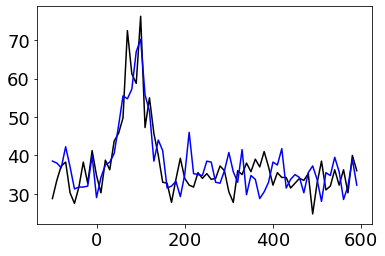

In [87]:
plt.plot(t-9100, ctrlfr, c='black')
plt.plot(t-9100, pvfr, c='blue')

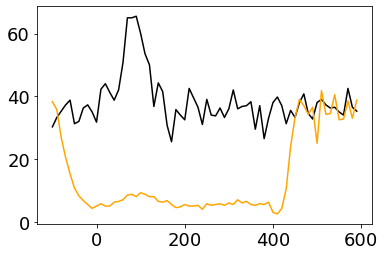

In [85]:
simname = 'lb8ns1.0e0.2'
# simname = 'v2base'
stim = 'SOM'
cont = 0.18
with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
    all_positions = pickle.load(f)

local_all = get_local_spikes(all_spikes, all_positions)
t, ctrlfr, sstfr = get_averages(local_all)
plt.plot(t-9100, ctrlfr, c='black')
plt.plot(t-9100, sstfr, c='orange')

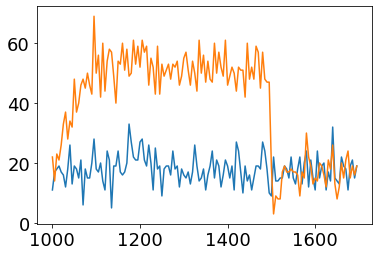

In [39]:
plt.plot(bins[:-1], hist2)
plt.plot(bins[:-1], hist)

In [25]:
simname = 'v2base'
N  = 0
tlen = 600
exc_ctrl, exc_stim, pv_ctrl, pv_stim, sst_ctrl, sst_stim = np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen])
for seed in range(1,30):
    try:
        with open(f'data/{simname}/results_{seed}/PV_0.33_spikes.pickle','rb') as f:
            all_spikes = pickle.load(f)
        with open(f'data/{simname}/results_{seed}/PV_0.33_positions.pickle','rb') as f:
            all_positions = pickle.load(f)
    except FileNotFoundError:
        continue
    ec,es,pc,ps,sc,ss = get_stmap(all_spikes, all_positions)
    N += 1
    
    exc_ctrl += ec
    exc_stim += es
    pv_ctrl += pc 
    pv_stim += ps 
    sst_ctrl += sc 
    sst_stim += ss
    
    print(seed)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [26]:
data = [exc_ctrl, exc_stim, pv_ctrl, pv_stim, sst_ctrl, sst_stim ]
with open('v2base_st.pickle','wb') as f:
    pickle.dump(data,f)

In [33]:
simname = 'v2base'
N  = 0
tlen = 600
exc_ctrl, exc_stim, pv_ctrl, pv_stim, sst_ctrl, sst_stim = np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen])
for seed in range(1,30):
    try:
        with open(f'data/{simname}/results_{seed}/SOM_0.33_spikes.pickle','rb') as f:
            all_spikes = pickle.load(f)
        with open(f'data/{simname}/results_{seed}/SOM_0.33_positions.pickle','rb') as f:
            all_positions = pickle.load(f)
    except FileNotFoundError:
        continue
    ec,es,pc,ps,sc,ss = get_stmap(all_spikes, all_positions)
    N += 1
    
    exc_ctrl += ec
    exc_stim += es
    pv_ctrl += pc 
    pv_stim += ps 
    sst_ctrl += sc 
    sst_stim += ss
    
    print(seed)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [35]:
data = [exc_ctrl, exc_stim, pv_ctrl, pv_stim, sst_ctrl, sst_stim ]
with open('v2base_st2.pickle','wb') as f:
    pickle.dump(data,f)

In [39]:
with open('v2base_st.pickle','rb') as f:
    datapv = pickle.load(f)
    
with open('v2base_st2.pickle','rb') as f:
    datasst = pickle.load(f)

In [40]:
from scipy.ndimage import gaussian_filter

sigma_x, sigma_t = 5, 20
ecs = gaussian_filter(exc_ctrl, sigma=(sigma_x, sigma_t))
ess = gaussian_filter(exc_stim, sigma=(sigma_x, sigma_t))
pcs = gaussian_filter(pv_ctrl, sigma=(sigma_x, sigma_t))
pss = gaussian_filter(pv_stim, sigma=(sigma_x, sigma_t))
scs = gaussian_filter(sst_ctrl, sigma=(sigma_x, sigma_t))
sss = gaussian_filter(sst_stim, sigma=(sigma_x, sigma_t))

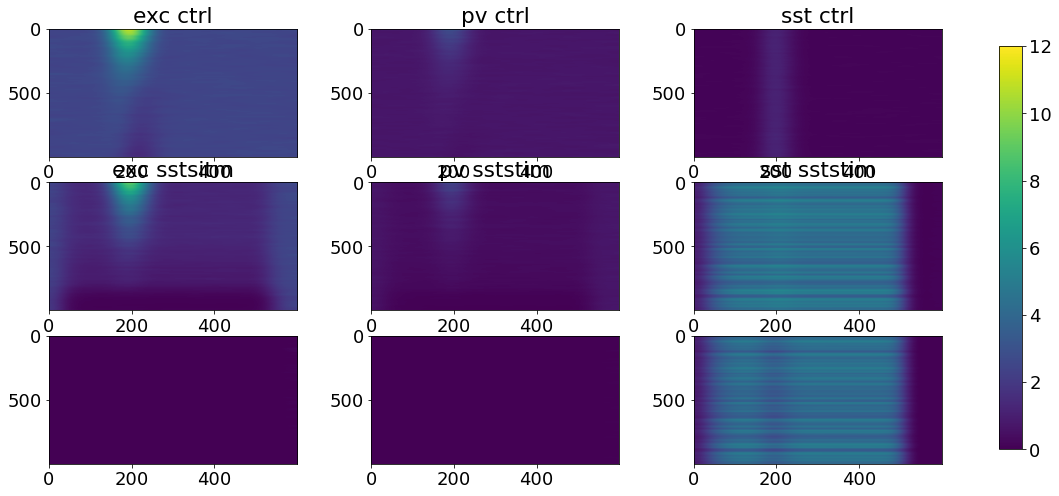

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# create a 1x3 subplot grid
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 8))

toplot = [[ecs,pcs,scs],[ess,pss,sss]]
titles = [['exc ctrl', 'pv ctrl', 'sst ctrl'], ['exc sstsitm', 'pv sststim', 'sst sststim']]

rows = [0,1]
cols = [0,1,2]
for ri in rows:
    for ci in cols:
        axs[ri,ci].imshow(toplot[ri][ci][:,:], cmap='viridis', aspect='auto', vmin=0, vmax = 12)
        axs[ri,ci].set_title(titles[ri][ci])
ri = 2
for ci in cols:
    axs[ri,ci].imshow(toplot[1][ci][:,:]-toplot[0][ci][:,:], cmap='viridis', aspect='auto', vmin=0, vmax = 12)
#     axs[ri,ci].set_title(titles[ri][ci])
#         axs[ri,ci].set_xrange(0,2000)


# adjust the spacing between the subplots and add a colorbar
plt.subplots_adjust(wspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(axs[0,0].images[0], cax=cbar_ax)



# display the plot
# plt.savefig()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create a 1x3 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

# plot the first array as a heatmap in the first subplot
axs[0].imshow(exc_ctrl, cmap='viridis', aspect='auto', vmax = 5)
axs[0].set_title('exc_ctrl')

# plot the second array as a heatmap in the second subplot
axs[1].imshow(pv_ctrl, cmap='viridis', aspect='auto', vmax = 5)
axs[1].set_title('pv_ctrl')

# plot the third array as a heatmap in the third subplot
axs[2].imshow(sst_ctrl, cmap='viridis', aspect='auto', vmax = 5)
axs[2].set_title('sst_ctrl')

# adjust the spacing between the subplots and add a colorbar
plt.subplots_adjust(wspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(axs[0].images[0], cax=cbar_ax)



# display the plot
plt.show()

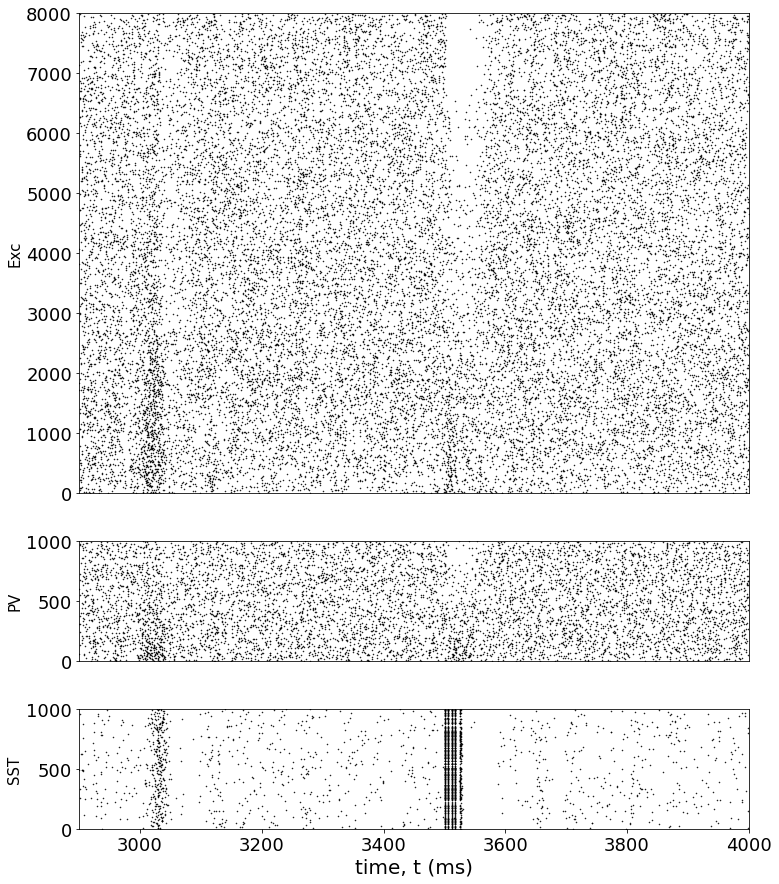

In [22]:
simname = 'v2a0.0175p0.6'
with open(f'data/{simname}/results_1/SOM_0.33_spikes.pickle','rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/SOM_0.33_positions.pickle','rb') as f:
    all_positions = pickle.load(f)
plot_raster(all_spikes, all_positions, tmin = 2900, tmax = 4000)